In [1]:
import pandas as pd
from currency_to_int import currency_to_number, replace_hyphen_in_columns, extract_minutes, extract_first_category
from currency_to_int import convert_gross_to_numeric

from matplotlib import pyplot as plt
import seaborn as sns

from typing import List, Tuple

In [2]:
box_office = pd.read_csv("box_office.csv")
full_movies = pd.read_csv("movies.csv")

In [3]:
full_movies = full_movies.fillna(0)

In [4]:
full_movies["runtime"] = full_movies["runtime"].map(extract_minutes) 

In [5]:
full_movies = full_movies.fillna(0)

In [6]:
full_movies["genre"] = full_movies["genre"].map(extract_first_category)

In [7]:
for row in full_movies.itertuples():
    full_movies.loc[row[0],"gross"] = convert_gross_to_numeric(full_movies.loc[row[0],"gross"])

In [8]:
full_movies = full_movies.fillna(0)

In [9]:
full_movies["gross"] = full_movies["gross"]/1000000

In [10]:
full_movies["gross"] = full_movies["gross"].round(2)
full_movies = full_movies[(full_movies["critic_rating"]!=0) & (full_movies["audience_rating"]!=0)]

In [11]:
movies = full_movies[(full_movies["critic_rating"]!=0) & (full_movies["audience_rating"]!=0)]

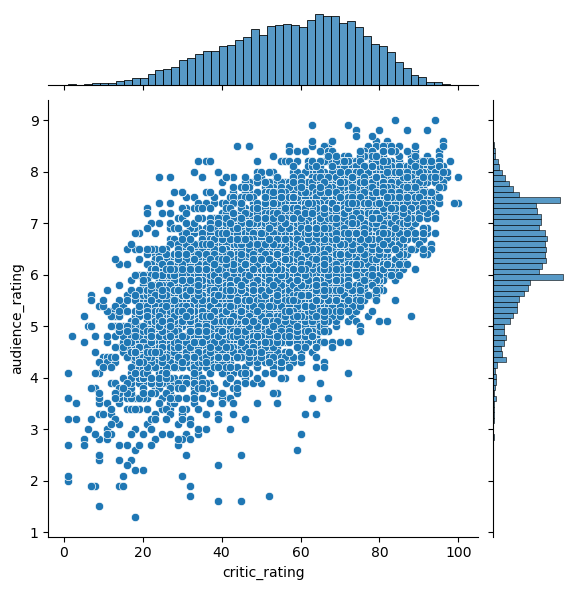

In [12]:
sns.jointplot(data=movies, x='critic_rating', y='audience_rating')

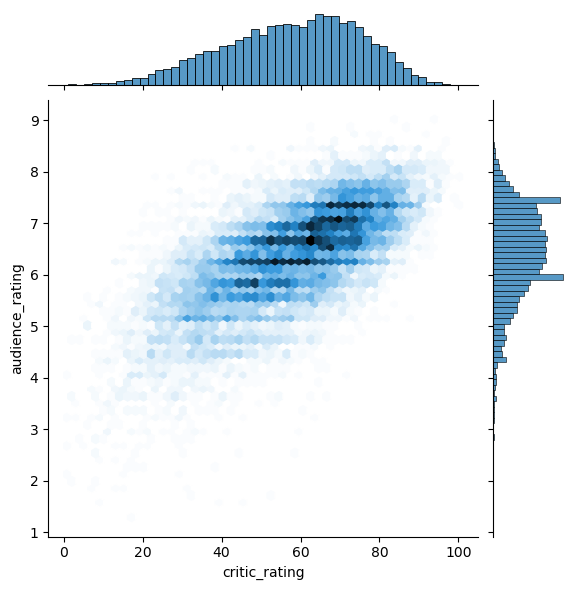

In [13]:
sns.jointplot(data=movies, x='critic_rating', y='audience_rating', kind="hex")

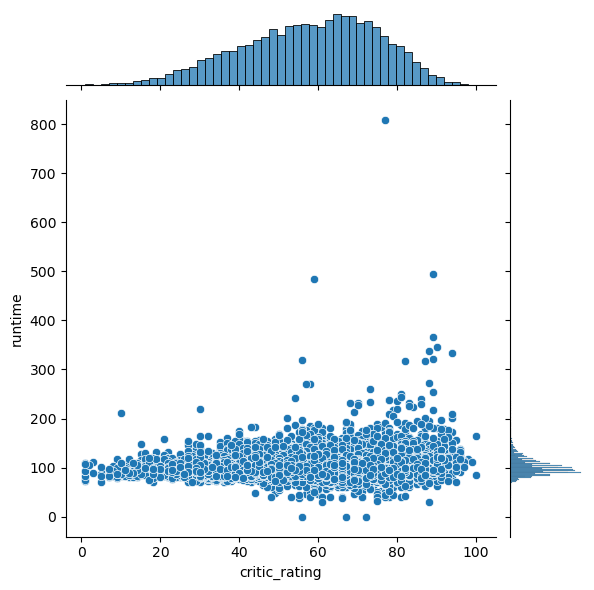

In [14]:
sns.jointplot(data=movies, x='critic_rating', y='runtime')

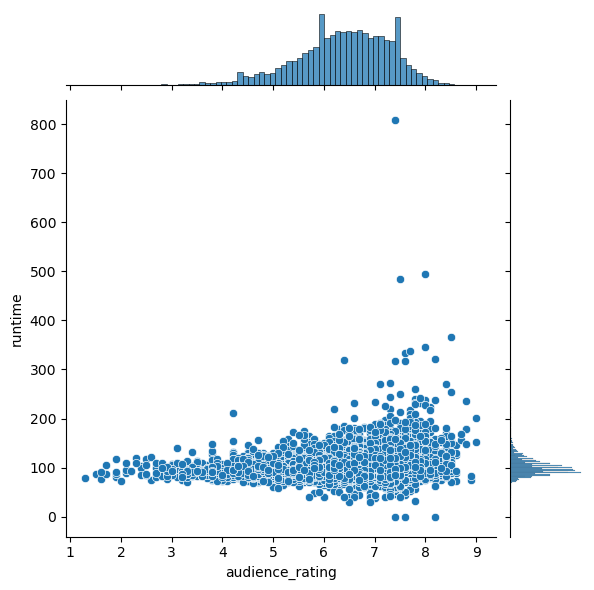

In [15]:
sns.jointplot(data=movies, x='audience_rating', y='runtime')

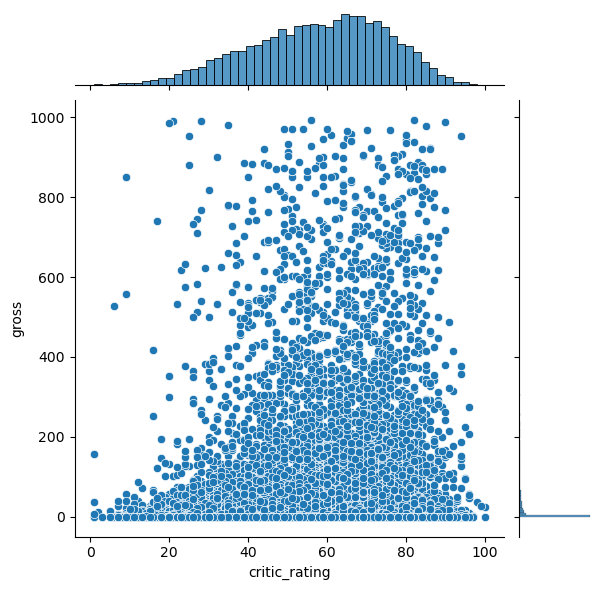

In [16]:
sns.jointplot(data=movies, x='critic_rating', y='gross')

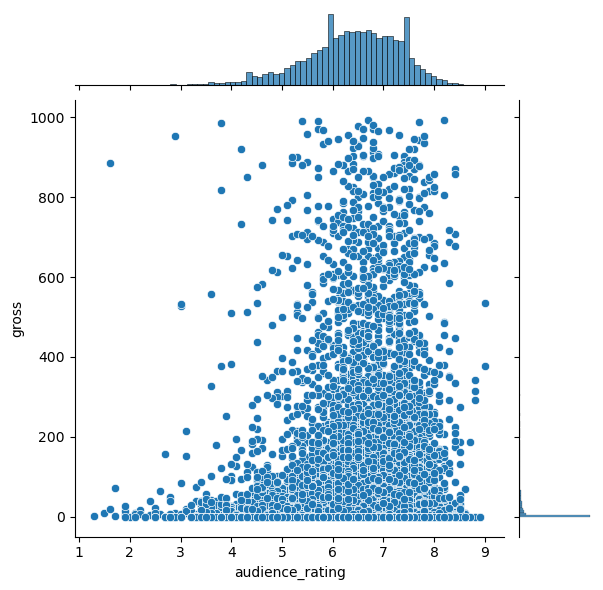

In [17]:
sns.jointplot(data=movies, x='audience_rating', y='gross')

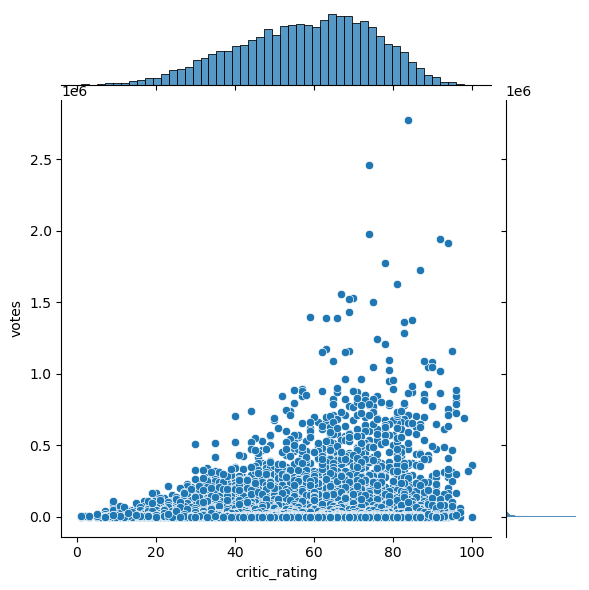

In [18]:
sns.jointplot(data=movies, x='critic_rating', y='votes')

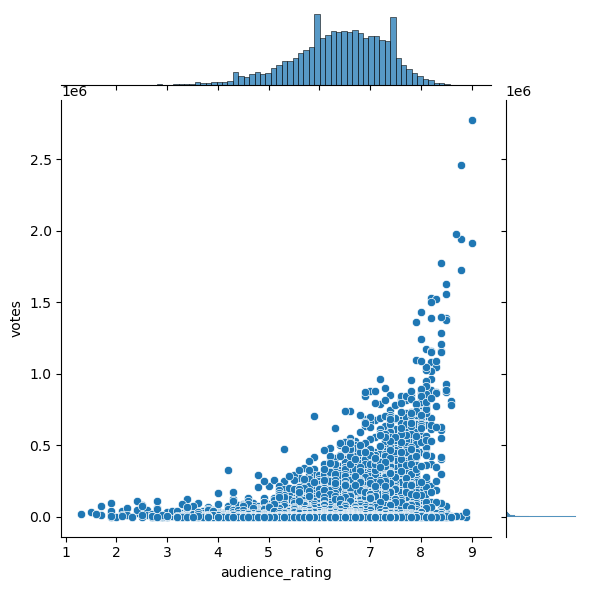

In [19]:
sns.jointplot(data=movies, x='audience_rating', y='votes')

In [20]:
full_movies

,title,audience_rating,genre,critic_rating,runtime,votes,gross,year
0,Gladiator,8.5,Action,67.0,155,1558798,187.71,2000
1,Memento,8.4,Mystery,83.0,113,1284272,25.54,2000
2,Snatch,8.2,Comedy,55.0,104,884669,30.33,2000
3,Requiem for a Dream,8.3,Drama,71.0,102,872915,3.64,2000
4,American Psycho,7.6,Crime,64.0,102,674139,15.07,2000
...,...,...,...,...,...,...,...,...
229519,The YouTube Effect,5.8,Documentary,53.0,99,198,0.00,2022
229604,Jazz Fest: A New Orleans Story,7.1,Documentary,78.0,95,195,0.00,2022
229710,"Hello, Bookstore",7.4,Documentary,73.0,86,191,0.00,2022
229826,The American Dream and Other Fairy Tales,6.5,Documentary,61.0,87,188,0.00,2022


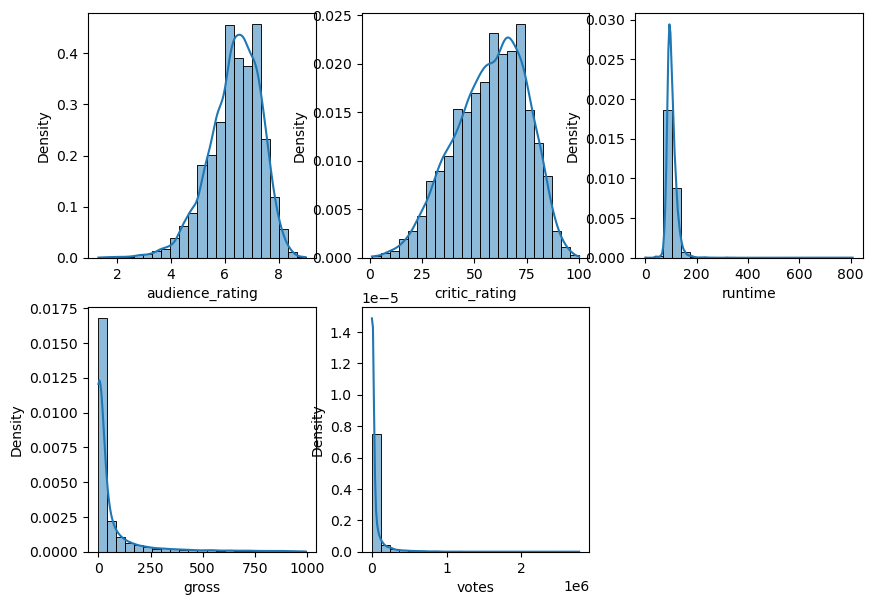

In [21]:
def plot_movie_metrics(df: pd.DataFrame):
    """
    Plots various movie metrics in a 2x3 grid.

    Args:
        df (pd.DataFrame): The DataFrame containing movie metrics.

    Returns:
        None

    Example:
        >>> plot_movie_metrics(pd.DataFrame({"audience_rating": [...], "critic_rating": [...], ...}))
    """
    fig, axes = plt.subplots(2, 3)
    fig.set_size_inches(10, 7)

    sns.histplot(df['audience_rating'], stat="density", kde=True, bins=23, ax=axes[0, 0])
    sns.histplot(df['critic_rating'], stat="density", kde=True, bins=23, ax=axes[0, 1])
    sns.histplot(df['runtime'], stat="density", kde=True, bins=23, ax=axes[0, 2])
    sns.histplot(df['gross'], stat="density", kde=True, bins=23, ax=axes[1, 0])
    sns.histplot(df['votes'], stat="density", kde=True, bins=23, ax=axes[1, 1])

    # You can leave the last subplot empty or put something else there
    axes[1, 2].axis('off')
    

plot_movie_metrics(full_movies)

In [22]:
full_movies['genre'] = full_movies['genre'].astype('category')

In [23]:
def subset_dataframe_by_genres(df: pd.DataFrame, genres: List[str]) -> pd.DataFrame:
    """
    Subset a DataFrame by given genres and remove any unused categories.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to subset
    - genres (List[str]): List of genres to keep
    
    Returns:
    - pd.DataFrame: The subsetted DataFrame
    """
    # Create a boolean mask by iterating through the genres and using the `or` operator
    mask = df['genre'].isin(genres)
    
    # Subset the DataFrame
    subset_df = df.loc[mask]
    
    # Remove unused categories
    subset_df['genre'] = subset_df['genre'].cat.remove_unused_categories()
    
    return subset_df

# List of genres for each subset
genres1 = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime']
genres2 = ['Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music']
genres3 = ['Mistery','Romance','Sci','Thriller','War','Western']


# Subset the DataFrame using the function
dataMovies_genre1 = subset_dataframe_by_genres(full_movies, genres1)
dataMovies_genre2 = subset_dataframe_by_genres(full_movies, genres2)
dataMovies_genre3 = subset_dataframe_by_genres(full_movies, genres3)


/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_9064/1021480005.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['genre'] = subset_df['genre'].cat.remove_unused_categories()
/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_9064/1021480005.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['genre'] = subset_df['genre'].cat.remove_unused_categories()
/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_9064/1021480005.py:19: SettingWithCopyWarning: 
A value

In [24]:
def plot_histogram(ax, data: List[pd.Series], labels: List[str], xlabel: str, ylabel: str = None, bins: int = 30):
    """
    Plot a histogram on a given subplot ax.
    
    Parameters:
    - ax: The subplot to plot on
    - data: List of pandas Series representing the data for each category
    - labels: List of labels for each category
    - xlabel: The label for the x-axis
    - ylabel: The label for the y-axis (default is None)
    - bins: The number of bins to use in the histogram (default is 30)
    
    """
    ax.hist(data, bins=bins, stacked=True, rwidth=1, label=labels)
    ax.set(xlabel=xlabel)
    if ylabel:
        ax.set(ylabel=ylabel)
    ax.legend()

def plot_movie_data(dataMovies: pd.DataFrame, categories: List[str], metric: str, limit=None, bins: int = 30):
    """
    Plot histograms for movie data based on categories and metric (either 'gross' or 'audience_rating').
    
    Parameters:
    - dataMovies: DataFrame containing the movie data
    - categories: List of genres to consider
    - metric: The metric to plot ('gross' or 'audience_rating')
    - bins: The number of bins to use in the histogram (default is 30)
    """
    data_by_categories = []
    labels = []
    if limit:
        dataMovies = dataMovies[dataMovies[metric]>limit].reset_index(drop=True)
    
    for category in categories:
        data_by_category = dataMovies[dataMovies.genre == category][metric]
        data_by_categories.append(data_by_category)
        labels.append(category)
        
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(15, 3)
    
    xlabel = f"{metric.capitalize()} 2000-2022"
    ylabel = 'Number of movies' if metric == 'gross' else None
    
    plot_histogram(ax, data_by_categories, labels, xlabel, ylabel, bins)
    plt.show()


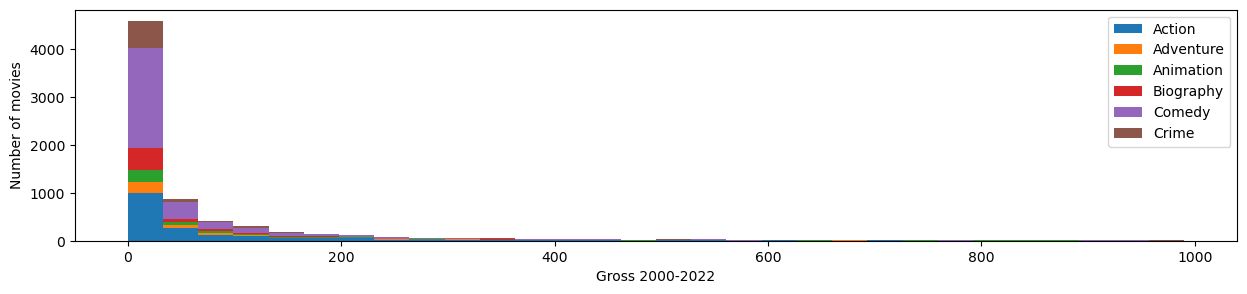

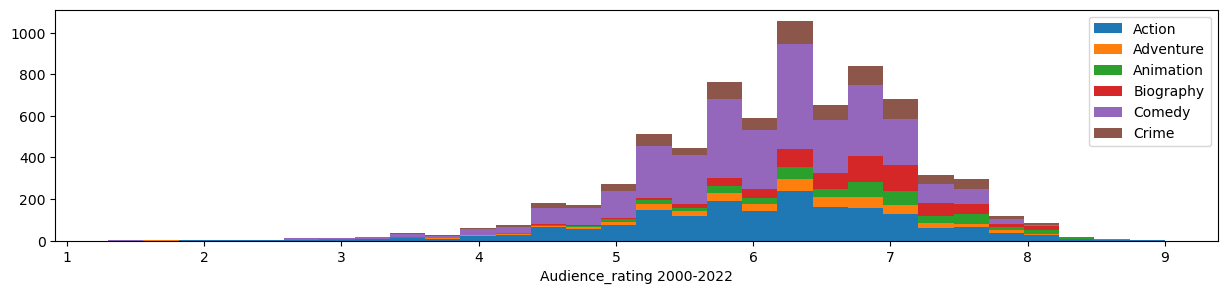

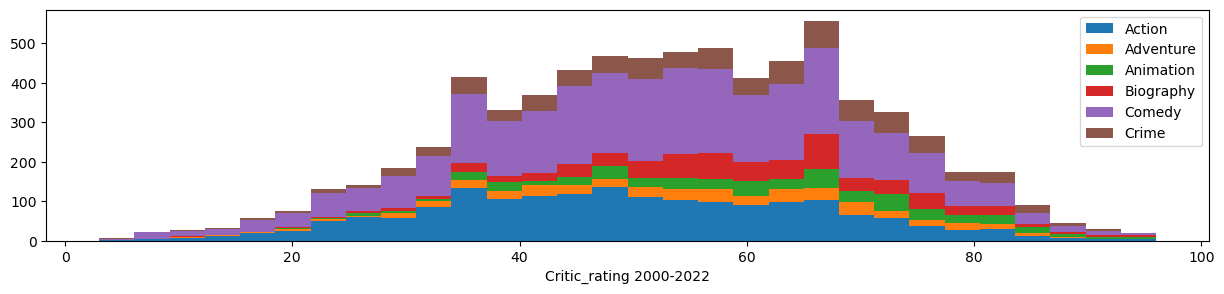

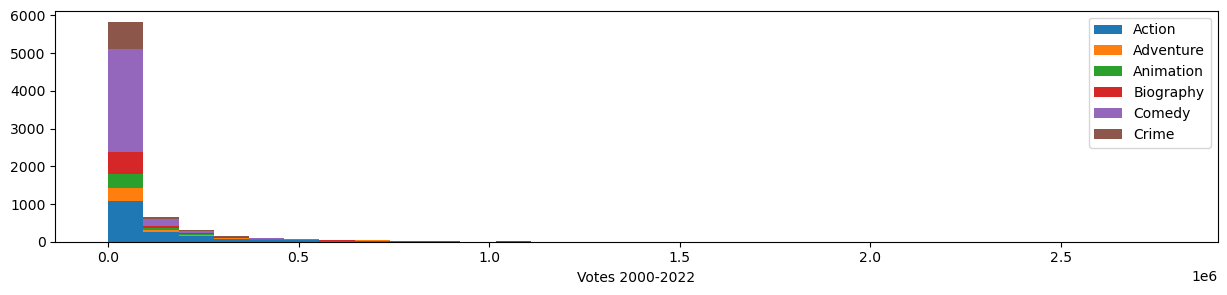

In [25]:
# Plotting the gross metrics
plot_movie_data(dataMovies_genre1, genres1, 'gross')

# Plotting the audience_rating metrics
plot_movie_data(dataMovies_genre1, genres1, 'audience_rating')

# Plotting the audience_rating metrics
plot_movie_data(dataMovies_genre1, genres1, 'critic_rating', 1)

# Plotting the audience_rating metrics
plot_movie_data(dataMovies_genre1, genres1, 'votes', 0)

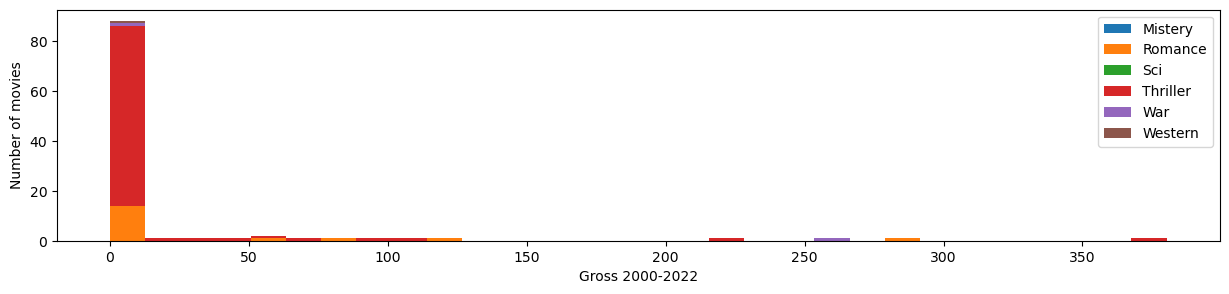

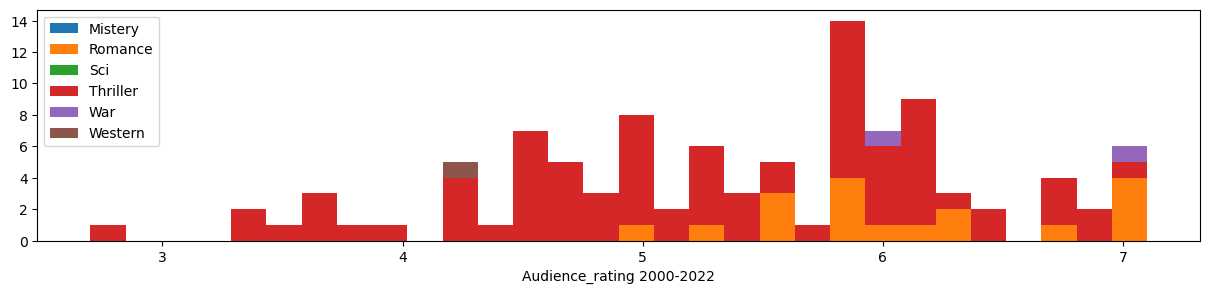

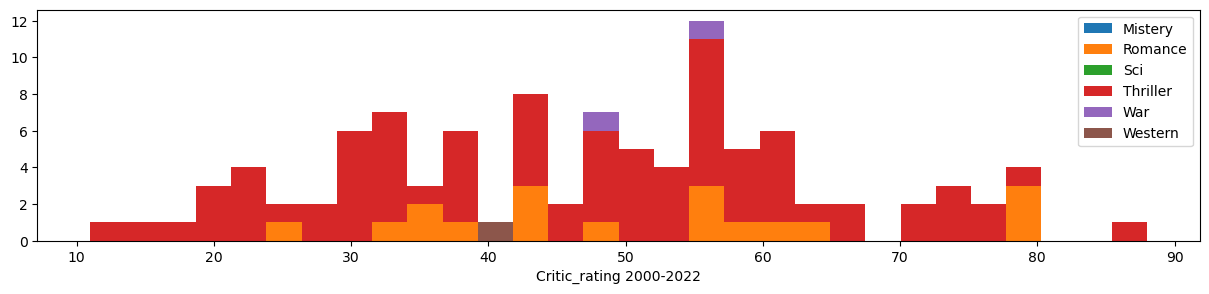

In [26]:
# Plotting the gross metrics
plot_movie_data(dataMovies_genre3, genres3, 'gross')

# Plotting the audience_rating metrics
plot_movie_data(dataMovies_genre3, genres3, 'audience_rating')

# Plotting the audience_rating metrics
plot_movie_data(dataMovies_genre3, genres3, 'critic_rating', 1)

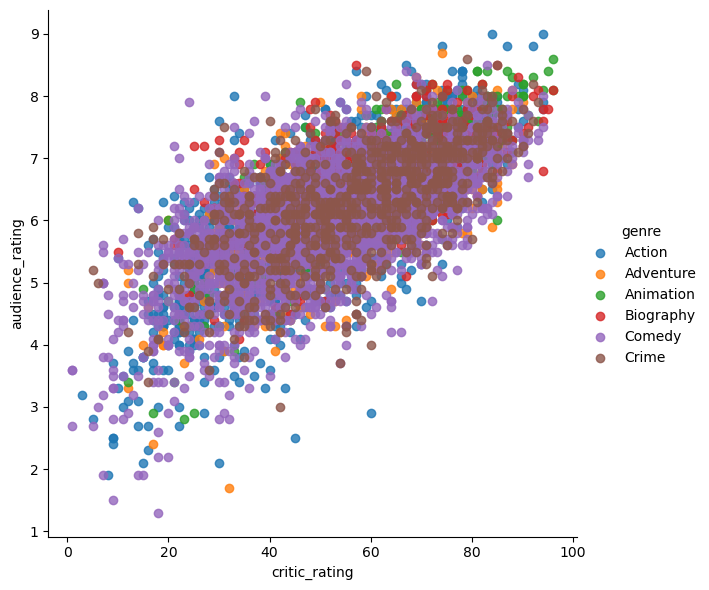

In [27]:
sns.lmplot(data=dataMovies_genre1, x='critic_rating', y='audience_rating', \
                 fit_reg=False, hue='genre', height=6, aspect=1)

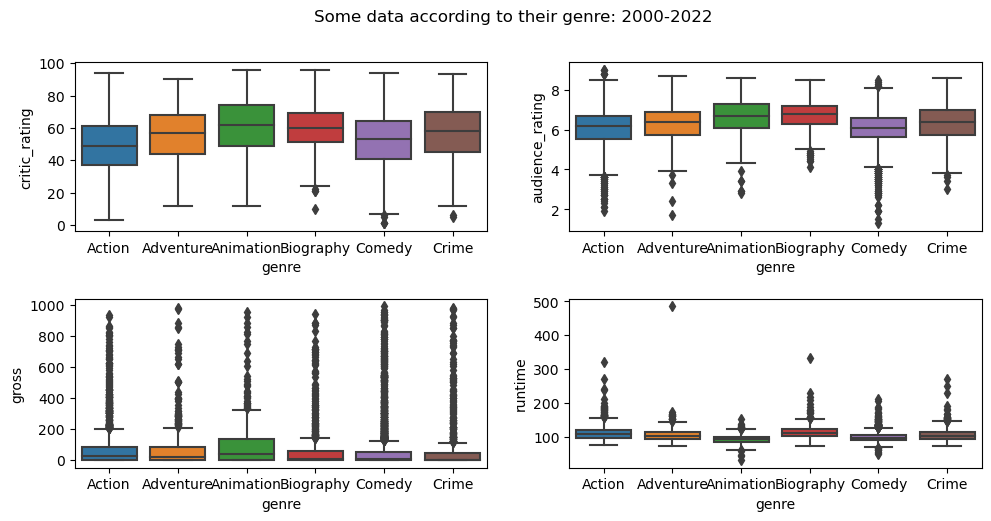

In [28]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(11.7, 5.27)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

sns.boxplot(data=dataMovies_genre1, x='genre', y='critic_rating', ax=axes[0, 0])
sns.boxplot(data=dataMovies_genre1, x='genre', y='audience_rating', ax=axes[0, 1])
sns.boxplot(data=dataMovies_genre1, x='genre', y='gross', ax=axes[1, 0])
sns.boxplot(data=dataMovies_genre1, x='genre', y='runtime', ax=axes[1, 1])

plt.suptitle('Some data according to their genre: 2000-2022')

plt.show()

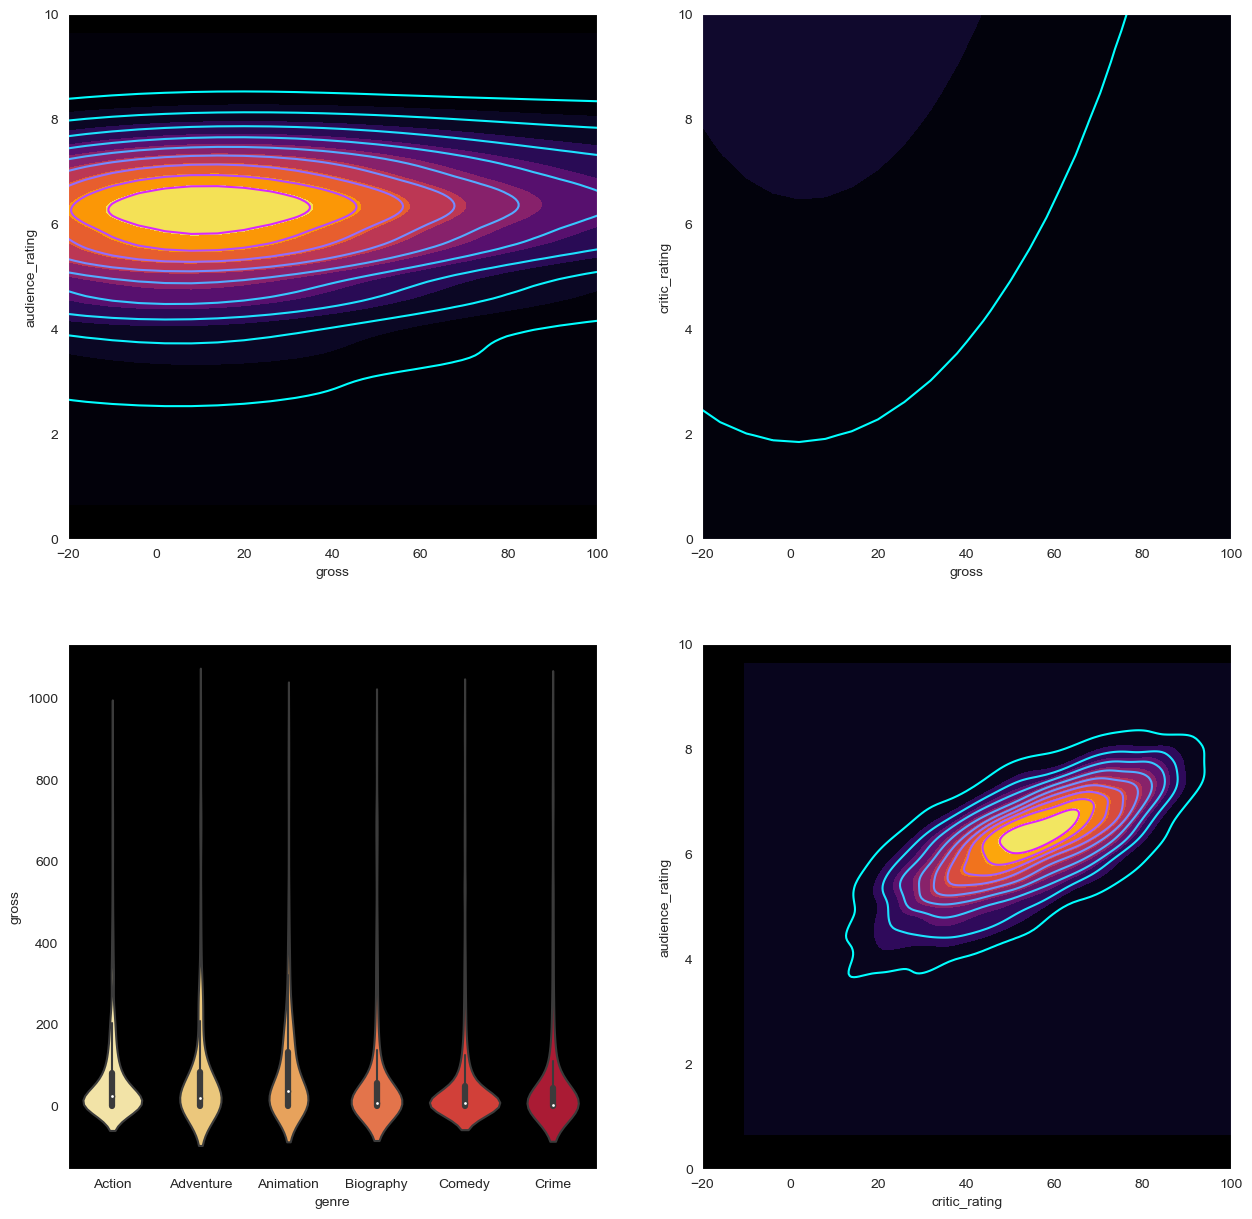

In [29]:
def kde_plot(ax: plt.Axes, x_data, y_data, shade: bool, thresh: float, cmap: str, xlim: Tuple[int, int], ylim: Tuple[int, int]):
    """
    Create a KDE plot.
    """
    sns.kdeplot(x=x_data, y=y_data, shade=shade, thresh=thresh, cmap=cmap, ax=ax)
    ax.set(xlim=xlim, ylim=ylim)

def violin_plot(ax: plt.Axes, data, x_col: str, y_col: str, palette: str):
    """
    Create a violin plot.
    """
    sns.violinplot(data=data, x=x_col, y=y_col, ax=ax, palette=palette)

def plot_movie_metrics(data: pd.DataFrame):
    """
    Create a 2x2 grid of plots.
    """
    sns.set_style("dark", {"axes.facecolor": "black"})
    f, axes = plt.subplots(2, 2, figsize=(15, 15))

    # Plot [0,0]
    kde_plot(axes[0, 0], data.gross, data.audience_rating, shade=True, thresh=0, cmap='inferno', xlim=(-20, 100), ylim=(0, 10))
    kde_plot(axes[0, 0], data.gross, data.audience_rating, shade=False, thresh=0.05, cmap='cool', xlim=(-20, 100), ylim=(0, 10))
    
    # Plot [0,1]
    kde_plot(axes[0, 1], data.gross, data.critic_rating, shade=True, thresh=0, cmap='inferno', xlim=(-20, 100), ylim=(0, 10))
    kde_plot(axes[0, 1], data.gross, data.critic_rating, shade=False, thresh=0.05, cmap='cool', xlim=(-20, 100), ylim=(0, 10))
    
    # Plot [1,0]
    violin_plot(axes[1, 0], data, 'genre', 'gross', 'YlOrRd')

    # Plot [1,1]
    kde_plot(axes[1, 1], data.critic_rating, data.audience_rating, shade=True, thresh=0, cmap='inferno', xlim=(-20, 100), ylim=(0, 10))
    kde_plot(axes[1, 1], data.critic_rating, data.audience_rating, shade=False, thresh=0.05, cmap='cool', xlim=(-20, 100), ylim=(0, 10))

    plt.show()

# Let's test it # Replace with your actual DataFrame
plot_movie_metrics(dataMovies_genre1)

In [ ]:
def time_string_to_unix_milliseconds(time_str: str, sd: bool = False) -> int:
    """
    Convert a time string in the format HH:MM:SS to Unix time in milliseconds.
    
    Parameters:
    -----------
    time_str : str
        The time string in the format of HH:MM:SS.
        
    sd : bool, optional
        A flag indicating if the input time string is in standard day format (default is False).
        If False, it means the time is considered in a 24+ hour format for hours less than 12.
        
    Returns:
    --------
    int
        The Unix time in milliseconds corresponding to the input time string.
        
    Examples:
    ---------
    >>> time_string_to_unix_milliseconds("10:15:30")
    36930000
    
    >>> time_string_to_unix_milliseconds("10:15:30", sd=True)
    36930000
    
    >>> time_string_to_unix_milliseconds("10:15:30", sd=False)
    138930000
    
    Notes:
    ------
    Unix time starts at "1970-01-01 00:00:00" and is calculated in milliseconds.
    
    """
    # Parse the time string into hours, minutes, and seconds.
    hours, minutes, seconds = map(int, time_str.split(':'))
    
    # If hours are less than 12 and sd flag is False, consider it in a 24+ hour format.
    if hours < 12 and not sd:
        return ((24 + hours) * 60 * 60 + minutes * 60 + seconds) * 1000
    
    # Otherwise, convert it according to standard day format.
    return (hours * 60 * 60 + minutes * 60 + seconds) * 1000